In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB, BernoulliNB

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('../assests/scaled_voice_data.csv')

In [37]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,meanfun,minfun,modindx,gender
0,0.053833,0.182412,-0.043344,-0.211354,0.539997,0.538854,-0.240888,0.835319,-0.042416,0.207412,-0.837226,0.540973,-0.366495,male
1,-1.948336,1.299573,-2.059818,-1.855442,-0.519379,1.824196,0.163259,1.025120,1.077412,-2.141210,-1.247501,-1.089900,0.159773,male
2,0.646042,0.495259,0.871554,0.640148,1.145548,-0.095419,-0.201828,0.608758,0.670084,0.694611,0.648140,0.567828,-0.761240,female
3,0.676572,-0.985618,0.417501,0.876052,-0.107268,-1.056066,-0.218332,-0.515259,-0.533573,0.230766,0.775463,0.602869,-0.112419,female
4,0.945822,-0.909062,0.667029,1.041938,0.402815,-0.962975,-0.219860,-0.715600,-0.588908,0.517069,0.611636,0.652038,-0.295663,female


Naive Bayes Implementations

In [38]:
class NavieBayesModel:

    def Gaussian_Naive_Bayes(x_train, y_train, x_test, y_test, i, k, display_stats=False):
        NB_model = GaussianNB()
        NB_model.fit(x_train,y_train)
        y_pred = NB_model.predict(x_test)

        # Accuracy, Precision, Recall, F1-score of Model
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='weighted')
        recall = metrics.recall_score(y_test, y_pred, average='weighted')
        f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

        if display_stats:
            print(f"Statistics for Fold {i} in K-fold (k={k}) 'Logistic Regression' algorithm")
            print(f"Accuracy: {accuracy}")
            print(f"Precision: {precision}")
            print(f"Recall: {recall}")
            print(f"F1-score: {f1_score}")
            print()
            
        return np.array([accuracy, precision, recall, f1_score])

    def Multinomial_Naive_Bayes(x_train, y_train, x_test, y_test, i, k, display_stats=False):
        NB_model = MultinomialNB()
        NB_model.fit(x_train,y_train)
        y_pred = NB_model.predict(x_test)

        # Accuracy, Precision, Recall, F1-score of Model
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='weighted')
        recall = metrics.recall_score(y_test, y_pred, average='weighted')
        f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

        if display_stats:
            print(f"Statistics for Fold {i} in K-fold (k={k}) 'Logistic Regression' algorithm")
            print(f"Accuracy: {accuracy}")
            print(f"Precision: {precision}")
            print(f"Recall: {recall}")
            print(f"F1-score: {f1_score}")
            print()
            
        return np.array([accuracy, precision, recall, f1_score])

    def Categorical_Naive_Bayes(x_train, y_train, x_test, y_test, i, k, display_stats=False):
        NB_model = CategoricalNB()
        NB_model.fit(x_train,y_train)
        y_pred = NB_model.predict(x_test)

        # Accuracy, Precision, Recall, F1-score of Model
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='weighted')
        recall = metrics.recall_score(y_test, y_pred, average='weighted')
        f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

        if display_stats:
            print(f"Statistics for Fold {i} in K-fold (k={k}) 'Logistic Regression' algorithm")
            print(f"Accuracy: {accuracy}")
            print(f"Precision: {precision}")
            print(f"Recall: {recall}")
            print(f"F1-score: {f1_score}")
            print()
            
        return np.array([accuracy, precision, recall, f1_score])

    def Bernoulli_Naive_Bayes(x_train, y_train, x_test, y_test, i, k, display_stats=False):
        NB_model = BernoulliNB()
        NB_model.fit(x_train,y_train)
        y_pred = NB_model.predict(x_test)

        # Accuracy, Precision, Recall, F1-score of Model
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='weighted')
        recall = metrics.recall_score(y_test, y_pred, average='weighted')
        f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

        if display_stats:
            print(f"Statistics for Fold {i} in K-fold (k={k}) 'Logistic Regression' algorithm")
            print(f"Accuracy: {accuracy}")
            print(f"Precision: {precision}")
            print(f"Recall: {recall}")
            print(f"F1-score: {f1_score}")
            print()
            
        return np.array([accuracy, precision, recall, f1_score])

#### Implementing Gaussian Naive Bayes

In [39]:
def run_Gaussian_NaiveBayes():
    x = df.drop('gender', axis=1)
    y = df['gender']

    k = 10
    i = 0
    k_fold = KFold(n_splits=k)

    # Holds Mean of {accuracy, precision, recall, f1_score}
    mean_stats = np.zeros(4)

    for train_index, test_index in k_fold.split(x):
        x_train, x_test = x.loc[train_index], x.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        stats = NavieBayesModel.Gaussian_Naive_Bayes(x_train, y_train, x_test, y_test, i:=i+1, k, display_stats=False)
        # print(stats)
        mean_stats = mean_stats + stats
        
    # Take mean of {accuracy, precision, recall, f1_score}
    mean_stats = mean_stats / k

    print(f"Mean accuracy: {mean_stats[0]}")
    print(f"Mean Precision: {mean_stats[1]}")
    print(f"Mean Recall: {mean_stats[2]}")
    print(f"Mean F1-score: {mean_stats[3]}")

run_Gaussian_NaiveBayes()

Mean accuracy: 0.9286617018727787
Mean Precision: 0.9307402944202433
Mean Recall: 0.9286617018727787
Mean F1-score: 0.9286348445863141


#### Implementing Bernoulli Naive Byes

In [40]:
def run_Bernoulli_NaiveBayes():
    x = df.drop('gender', axis=1)
    y = df['gender']

    k = 10
    i = 0
    k_fold = KFold(n_splits=k)

    # Holds Mean of {accuracy, precision, recall, f1_score}
    mean_stats = np.zeros(4)

    for train_index, test_index in k_fold.split(x):
        x_train, x_test = x.loc[train_index], x.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        stats = NavieBayesModel.Bernoulli_Naive_Bayes(x_train, y_train, x_test, y_test, i:=i+1, k, display_stats=False)
        # print(stats)
        mean_stats = mean_stats + stats
        
    # Take mean of {accuracy, precision, recall, f1_score}
    mean_stats = mean_stats / k

    print(f"Mean accuracy: {mean_stats[0]}")
    print(f"Mean Precision: {mean_stats[1]}")
    print(f"Mean Recall: {mean_stats[2]}")
    print(f"Mean F1-score: {mean_stats[3]}")

run_Bernoulli_NaiveBayes()

Mean accuracy: 0.8746915305674239
Mean Precision: 0.8798348418671216
Mean Recall: 0.8746915305674239
Mean F1-score: 0.8744397748433717


## ROC-AUC Curve for Gaussian Naive Bayes

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn import metrics
import matplotlib.pyplot as plt

In [42]:
x = df.drop('gender',axis=1)
y = df['gender']

In [43]:
le = LabelEncoder()
Y_encoded = le.fit_transform(y)

In [44]:
xtrain_roc, xtest_roc, ytrain_roc, ytest_roc = train_test_split(x, Y_encoded, test_size=0.2)

In [45]:
def roc_auc(y_test, y_pred):
    fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(8,8))
    lisrt=['male','female']
    for m in range(2):
        ls=[]
        for j in y_test:
            if m==j:
                ls.append(1)
            else:
                ls.append(0)

        fpr, tpr, thresh =  metrics.roc_curve(ls,y_pred[:,m])
        auc = metrics.roc_auc_score(ls,y_pred[:,m])
        axes[m].plot(fpr, tpr,  label="AUC = " +str(auc), linestyle='--',color='red')
        axes[m].set_title(f'ROC-AUC curve for class {lisrt[m]}')
        axes[m].set_xlabel('False Positive Rate')
        axes[m].set_ylabel('True Positive rate')
        axes[m].legend(lisrt[m])
        axes[m].text(0.5,0.0, f'AUC value :{auc}')
        plt.savefig('images/ROC-AUC_Gaussian_Naive_Bayes.png',dpi=300)
        plt.tight_layout()

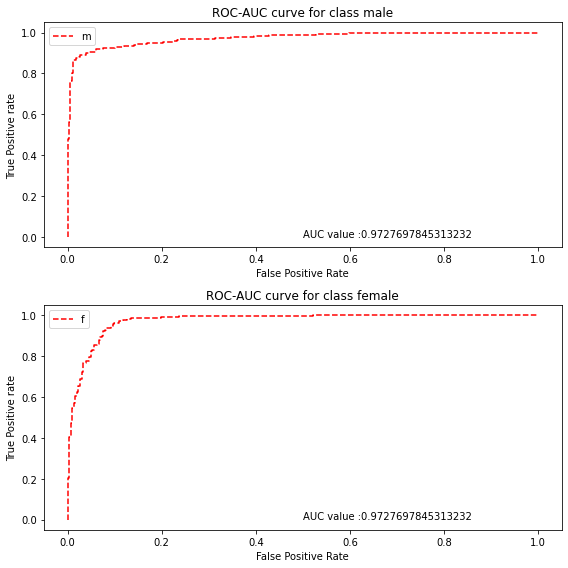

In [46]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(xtrain_roc, ytrain_roc)
ypred_roc = gaussian_nb.predict_proba(xtest_roc)

roc_auc(ytest_roc, ypred_roc)

# Loss curve plot for Gaussian Naive Bayes

In [47]:
x = df.drop('gender', axis=1)
y = df['gender']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

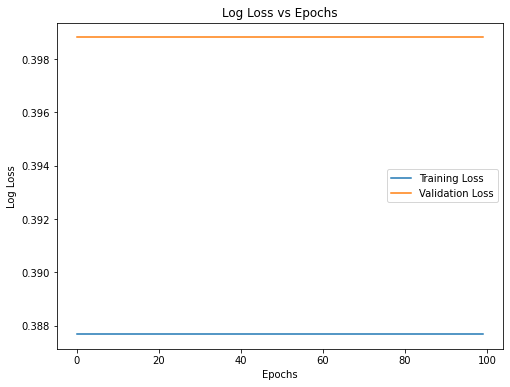

In [48]:
train_loss, test_loss = [], []
epochs = 100

gnb_model = GaussianNB()

for _ in range(epochs):
    gnb_model.partial_fit(x_train, y_train, classes=np.unique(y_train))
    
    train_loss.append(metrics.log_loss(y_train, gnb_model.predict_proba(x_train)))
    test_loss.append(metrics.log_loss(y_test, gnb_model.predict_proba(x_test)))

plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Epochs')
# plt.ylim(0, 5)
plt.legend()
plt.savefig('images/Log_Loss_Naive_Bayes.png',dpi=300);

# Loss curve plot for Bernoulli Naive Bayes

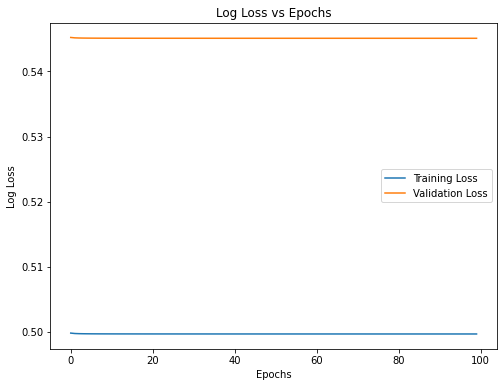

In [49]:
train_loss, test_loss = [], []
epochs = 100

bn_model = BernoulliNB()

for _ in range(epochs):
    bn_model.partial_fit(x_train, y_train, classes=np.unique(y_train))
    
    train_loss.append(metrics.log_loss(y_train, bn_model.predict_proba(x_train)))
    test_loss.append(metrics.log_loss(y_test, bn_model.predict_proba(x_test)))

plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Epochs')
# plt.ylim(0, 5)
plt.legend();